# Data Cleaning

In [1]:
#creating data from scratch
url_link_1 = "https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue"

In [2]:
import pandas as pd
company_data = pd.read_html(url_link_1)

In [3]:
type (company_data)

list

In [4]:
company_data = company_data[0] #dataframe

In [5]:
company_data.columns = company_data.columns.get_level_values(0) #changing multiindex to single index

In [6]:
#dropping a column
company_data.drop (columns= ['Ref.'], axis=1, inplace = True)

In [7]:
company_data.rename(columns={"Rank": "Ranking",
                   "Name": "Company Name", "Headquarters[note 1]" : "Headquarters"},
          inplace=True)

In [8]:
print(type(company_data))

<class 'pandas.core.frame.DataFrame'>


In [9]:
#summarising data
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ranking             50 non-null     int64  
 1   Company Name        50 non-null     object 
 2   Industry            50 non-null     object 
 3   Revenue             50 non-null     object 
 4   Profit              50 non-null     object 
 5   Employees           50 non-null     int64  
 6   Headquarters        50 non-null     object 
 7   State-owned         0 non-null      float64
 8   Unnamed: 9_level_0  50 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.6+ KB


In [10]:
#remove the dollar sign from the revenue column
company_data['Revenue'] = company_data['Revenue'].str.replace('$','')

In [11]:
company_data['Profit'] = company_data['Profit'].str.replace('$','')

In [12]:
company_data.drop(columns= ['Unnamed: 9_level_0'], axis=1, inplace = True)

In [13]:
company_data['Profit'] = company_data['Profit'].str.replace(',','')

In [14]:
company_data['Revenue'] = company_data['Revenue'].str.replace(',','')

In [15]:
#Renaming column for Rev. & Profit
company_data.rename(columns={"Revenue": "Revenue ($)",
                   "Profit": "Profit ($)"}, inplace =True)

In [16]:
company_data["Revenue ($)"] = company_data["Revenue ($)"].astype(float)

In [25]:
company_data ['Profit ($)'].unique() #to check unique data

array(['11680', '159069', '30425', '8192', '15000', '21080', '9657',
       '55740', '99803', '20120', '4149', '6994', '4234', '22819',
       '15233', '19961', '59972', '3560', '18110', '20526', '17320',
       '2487', '35465', '1699', '42398', '5844', '4751', '53589', '73307',
       '48145', '17669', '38524', '12454', '933', '6668', '14516',
       '11024', '1', '2035', '11528', '17641', <NA>, '16988', '1800',
       '2493', '8723', '1981', '15252'], dtype=object)

In [22]:
company_data["Profit ($)"] = company_data["Profit ($)"].str.replace("–", "")

In [24]:
company_data["Profit ($)"].replace('', pd.NA, inplace=True)

In [26]:
company_data.dropna(subset=['Profit ($)'], inplace=True)

In [27]:
company_data[["Revenue ($)", "Profit ($)"]] = company_data[["Revenue ($)", "Profit ($)"]].astype(float)

In [28]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 49
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       48 non-null     int64  
 1   Company Name  48 non-null     object 
 2   Industry      48 non-null     object 
 3   Revenue ($)   48 non-null     float64
 4   Profit ($)    48 non-null     float64
 5   Employees     48 non-null     int64  
 6   Headquarters  48 non-null     object 
 7   State-owned   0 non-null      float64
dtypes: float64(3), int64(2), object(3)
memory usage: 3.4+ KB


In [29]:
#filtering 
company_data.head()

,Ranking,Company Name,Industry,Revenue ($),Profit ($),Employees,Headquarters,State-owned
0,1,Walmart,Retail,611289.0,11680.0,2100000,United States,NaN
1,2,Saudi Aramco,Oil and gas,603651.0,159069.0,70496,Saudi Arabia,NaN
2,3,Amazon,Retail,574785.0,30425.0,1525000,United States,NaN
3,4,State Grid Corporation of China,Electricity,530009.0,8192.0,870287,China,NaN
4,5,Vitol,Commodities,505000.0,15000.0,1560,Switzerland,NaN


In [31]:
company_data['Employees'].min()

1560

In [32]:
emp_data = company_data[company_data['Employees']>= 100000]

In [33]:
emp_data

,Ranking,Company Name,Industry,Revenue ($),Profit ($),Employees,Headquarters,State-owned
0,1,Walmart,Retail,611289.0,11680.0,2100000,United States,NaN
2,3,Amazon,Retail,574785.0,30425.0,1525000,United States,NaN
3,4,State Grid Corporation of China,Electricity,530009.0,8192.0,870287,China,NaN
5,6,China National Petroleum Corporation,Oil and gas,483019.0,21080.0,1087049,China,NaN
6,7,China Petrochemical Corporation,Oil and gas,471154.0,9657.0,527487,China,NaN
8,9,Apple,Electronics,394328.0,99803.0,164000,United States,NaN
10,11,UnitedHealth Group,Healthcare,324162.0,20120.0,400000,United States,NaN
11,12,CVS Health,Healthcare,322467.0,4149.0,259500,United States,NaN
13,14,China State Construction Engineering,Construction,305885.0,4234.0,382492,China,NaN
14,15,Berkshire Hathaway,Financials,302089.0,22819.0,383000,United States,NaN


In [35]:
company_data.head()

,Ranking,Company Name,Industry,Revenue ($),Profit ($),Employees,Headquarters,State-owned
0,1,Walmart,Retail,611289.0,11680.0,2100000,United States,NaN
1,2,Saudi Aramco,Oil and gas,603651.0,159069.0,70496,Saudi Arabia,NaN
2,3,Amazon,Retail,574785.0,30425.0,1525000,United States,NaN
3,4,State Grid Corporation of China,Electricity,530009.0,8192.0,870287,China,NaN
4,5,Vitol,Commodities,505000.0,15000.0,1560,Switzerland,NaN


In [36]:
len(company_data)

48

In [37]:
company_data.tail()

,Ranking,Company Name,Industry,Revenue ($),Profit ($),Employees,Headquarters,State-owned
44,45,China Railway Construction Corporation,Construction,163037.0,1800.0,342098,China,NaN
45,46,Baowu,Steel,161698.0,2493.0,245675,China,NaN
47,48,Mitsubishi Group,Conglomerate,159371.0,8723.0,79706,Japan,NaN
48,49,Ford Motor Company,Automotive,158057.0,1981.0,173000,United States,NaN
49,50,Mercedes-Benz Group,Automotive,157403.0,15252.0,168797,Germany,NaN


In [38]:
emp_data['Ranking'].max()

50

# Grouping and Aggregating data

In [ ]:
#Under Understanding Group
#detailed usage 
#and examples, including splitting an object into groups, 
#iterating through groups, selecting a group, aggregation, and more.
#example 1: df = pd.DataFrame({'Animal': ['Falcon', 'Falcon','Parrot', 'Parrot'],'Max Speed': [380., 370., 24., 26.]})
#df.groupby(['Animal']).mean() Max Speed

In [44]:
company_data.groupby("Industry")

In [45]:
by_industry = company_data.groupby("Industry")

In [51]:
by_industry.groups['Oil and gas']
by_industry.get_group('Oil and gas')

,Ranking,Company Name,Industry,Revenue ($),Profit ($),Employees,Headquarters,State-owned
1,2,Saudi Aramco,Oil and gas,603651.0,159069.0,70496,Saudi Arabia,NaN
5,6,China National Petroleum Corporation,Oil and gas,483019.0,21080.0,1087049,China,NaN
6,7,China Petrochemical Corporation,Oil and gas,471154.0,9657.0,527487,China,NaN
7,8,ExxonMobil,Oil and gas,413680.0,55740.0,63000,United States,NaN
9,10,Shell,Oil and gas,386201.0,20120.0,93000,United Kingdom,NaN
20,21,TotalEnergies,Oil and gas,263310.0,20526.0,101279,France,NaN
22,23,BP,Oil and gas,248891.0,2487.0,67600,United Kingdom,NaN
23,24,Chevron,Oil and gas,246252.0,35465.0,43846,United States,NaN
36,37,Marathon Petroleum,Oil and gas,180012.0,14516.0,17800,United States,NaN
37,38,Phillips 66,Oil and gas,175702.0,11024.0,13000,United States,NaN


# MISSING VALUE & DATA

In [40]:
titanic = pd.read_csv ('titanic.csv')

In [52]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
titanic.shape

(891, 12)

# Complete Case Analysis- titanic1

In [62]:
#making a copy of Titanic data
titanic1 = titanic.copy()

In [63]:
titanic1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
titanic1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [65]:
#omitting columns with missing data
titanic1 = titanic1[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex','SibSp',
       'Parch', 'Ticket', 'Fare',]]

In [66]:
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


# Available case Analysis - titanic

In [67]:
#Ignoring the missing data and reporting that we ignored them.
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Dropping the variables -titanic2

In [68]:
#dropping missing data
titanic2 = titanic.copy()

In [70]:
#dropping cabin column
titanic2.drop(columns = 'Cabin', axis = 1, inplace = True)

In [71]:
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# DATA IMPUTATION

In [72]:
#make a copy
titanic3 = titanic.copy()

In [73]:
titanic3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [74]:
titanic3['Age'].dtypes

dtype('float64')

In [75]:
mean_age = titanic3.Age.mean()
mean_age

29.69911764705882

In [76]:
median_age = titanic3.Age.median()
median_age

28.0

In [78]:
mode_age = titanic3.Age.mode()
mode_age

0    24.0
Name: Age, dtype: float64

In [80]:
mode_age = mode_age.mean()
mode_age

24.0

In [81]:
titanic3['Age'].head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [85]:
#pandas method for filling values
titanic3['Age'].fillna(value = mean_age).head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [86]:
#using mode
titanic3['Age'].fillna(value = mode_age).head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [87]:
#using median
titanic3['Age'].fillna(value = median_age).head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

# IMPUTATION: RETAIN ALL DATA FOR ANALYSIS (LOCF & NOCB)

Last Observation Carried Forward (LOCF)

In [89]:
titanic3['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [91]:
titanic3.Age.ffill().head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    35.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

Next Observation Carried Backward (NOCB)

In [93]:
titanic3.Age.bfill().head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    54.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

# DATA IMPUTATION: LINEAR INTERPOLATION & ARBITARY VALUES

In [95]:
#import numerical python package
import numpy as np

In [106]:
import pandas as pd

# Creating a series with missing values
S = pd.Series([0, 1, np.nan, 3])
print(S)

0    0.0
1    1.0
2    NaN
3    3.0
dtype: float64


In [113]:
# Perform linear interpolation to fill missing values
S_interpolated = S.interpolate(method='linear')

print(S_interpolated)

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64


Arbitary Value Imputation

In [116]:
titanic3['Age'].fillna(-999).tail(10)

881     33.0
882     22.0
883     28.0
884     25.0
885     39.0
886     27.0
887     19.0
888   -999.0
889     26.0
890     32.0
Name: Age, dtype: float64

# OUTLIERS

In [117]:
salary = [23000, 27000, 35000,26000,39000]
#finding the average
np.mean(salary)

30000.0

In [118]:
salary = [23000, 27000, 35000,26000,39000,1000000]
#finding the average
np.mean(salary)

191666.66666666666

Detecting Outliers

In [119]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [121]:
titanic['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

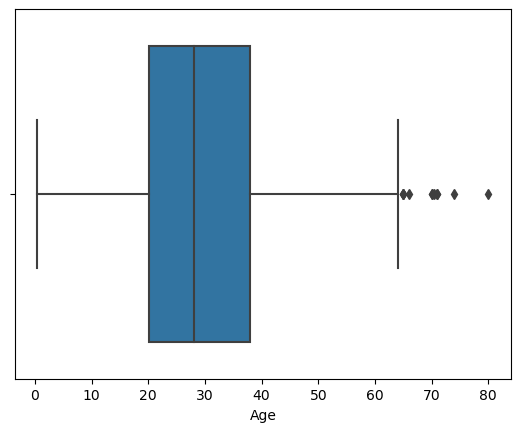

In [123]:
#import visualisation libararies
import seaborn as sns
sns.boxplot (data = titanic, x='Age');

In [124]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\RASHEEDAT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


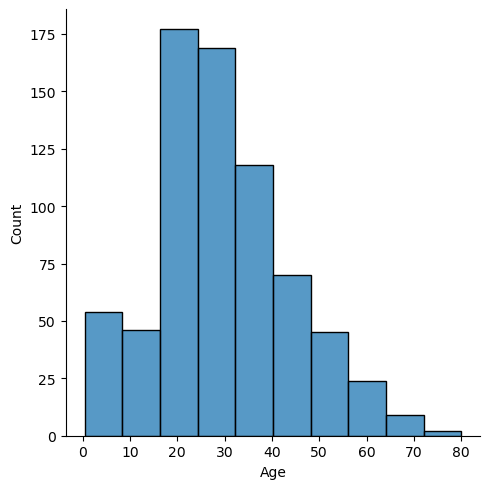

In [125]:
sns.displot (data = titanic, x='Age', bins = 10, kde = False)

<Axes: xlabel='Age', ylabel='Fare'>

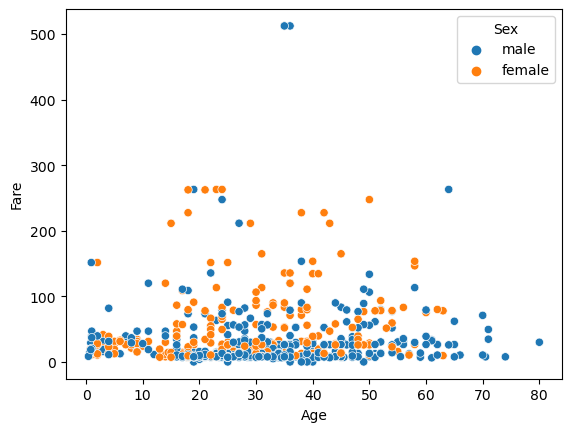

In [126]:
sns.scatterplot(data = titanic, x= 'Age', y= 'Fare', hue= 'Sex')

In [127]:
titanic.shape

(891, 12)

In [131]:
# Calculate Q1 and Q3
Q1 = titanic['Age'].quantile(0.25)
Q3 = titanic['Age'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper limits using Tukey's rule
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: -6.6875
Upper Limit: 64.8125


In [136]:
outlier_upper = (titanic['Age'] > upper_limit)

In [138]:
len(titanic['Age']- len(titanic['Age'][outlier_upper]))

891

In [140]:
outlier_lower = (titanic['Age'] > lower_limit)
len(titanic['Age']- len(titanic['Age'][outlier_lower]))

891

In [141]:
titanic_N = titanic[-(outlier_upper)]
titanic_N.shape

(880, 12)

In [142]:
titanic_N.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
titanic['Age'][outlier_upper].head()

33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
Name: Age, dtype: float64

The expression `titanic['Age'][outlier_upper]` will return a subset of the 'Age' column from the Titanic dataset where the values are greater than the upper limit calculated using Tukey's rule.

In other words, it will select only those age values from the 'Age' column that are identified as outliers based on the upper limit calculated using Tukey's rule. This subset will contain only the age values that exceed the upper limit, effectively isolating the outliers in the 'Age' column of the Titanic dataset.

<Axes: xlabel='Age'>

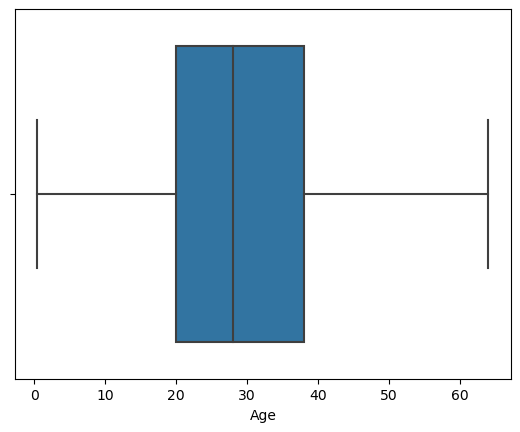

In [145]:
#Visualizing data without outliers
sns.boxplot(data = titanic_N, x= 'Age')

In [146]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

In [147]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [151]:
tip= sns.load_dataset('tips')

In [152]:
type(tip)

pandas.core.frame.DataFrame

In [153]:
tip.shape

(244, 7)

In [154]:
tip.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [155]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [158]:
tip.describe

<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

C:\Users\RASHEEDAT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


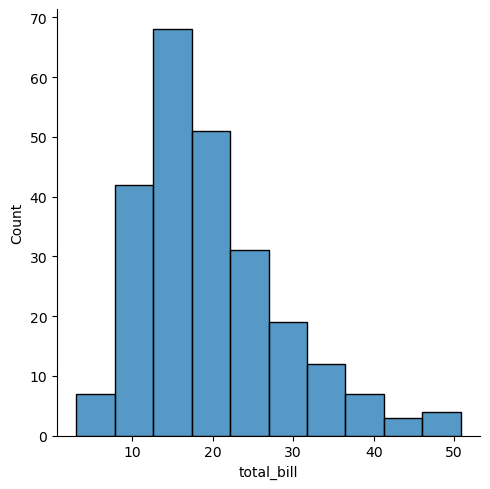

In [161]:
#Distribution
sns.displot(data = tip, x = 'total_bill', bins = 10, kde = False)

In [162]:
tip.describe(include = 'all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [163]:
tip['tip'].mean()

2.99827868852459

In [164]:
tip['tip'].median()

2.9

C:\Users\RASHEEDAT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


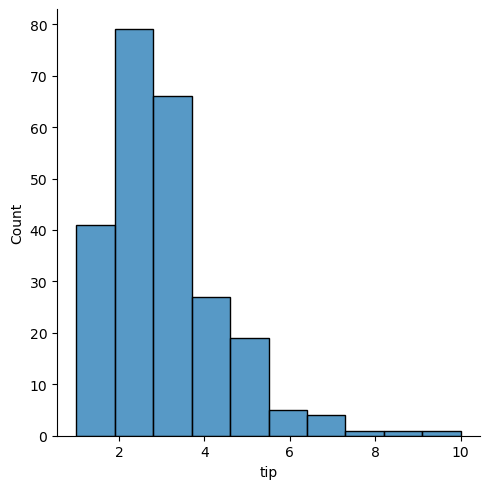

In [166]:
#Visualize the tops column
sns.displot(data = tip, x = 'tip', bins = 10, kde = False)

In [168]:
#Create A list
median_list = [2,3,4,5,6,7]
np.median(median_list)

4.5

In [169]:
#Create Another list
median_list = [2,3,4,5,6,7,2000]
np.median(median_list)

5.0

In [170]:
tip1 = tip.copy()

In [172]:
tip1['tip'][3] = np.nan
tip1['tip'].head()

C:\Users\RASHEEDAT\AppData\Local\Temp\ipykernel_9168\2177429527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tip1['tip'][3] = np.nan


0    1.01
1    1.66
2    3.50
3     NaN
4    3.61
Name: tip, dtype: float64

In [173]:
tip1['tip'].fillna(tip1['tip'].median()).head(10)

0    1.01
1    1.66
2    3.50
3    2.88
4    3.61
5    4.71
6    2.00
7    3.12
8    1.96
9    3.23
Name: tip, dtype: float64

In [175]:
tip1['tip'].fillna(tip1['tip'].mean()).head(10)

0    1.010000
1    1.660000
2    3.500000
3    2.996996
4    3.610000
5    4.710000
6    2.000000
7    3.120000
8    1.960000
9    3.230000
Name: tip, dtype: float64

In [176]:
tip1['tip'].describe()

count    243.000000
mean       2.996996
std        1.386349
min        1.000000
25%        2.000000
50%        2.880000
75%        3.575000
max       10.000000
Name: tip, dtype: float64

In [178]:
age_list =[23,12,14,13,21,26,25,20,28,25]
np.mean(age_list)

20.7

In [179]:
age_list = [23,12,14,13,21,26,25,20,28,25,68]
st.mean(age_list)

25

In [180]:
tip['total_bill'].mean()

19.78594262295082

In [181]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\RASHEEDAT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


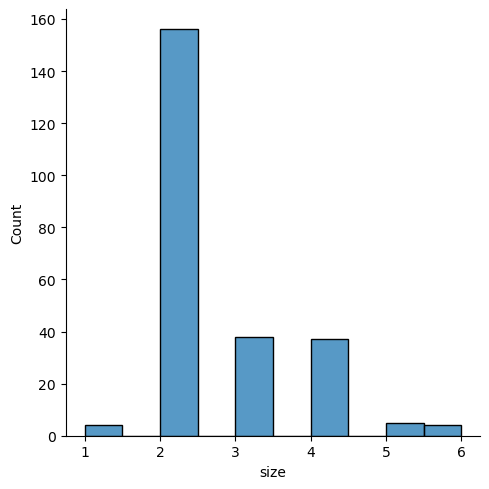

In [182]:
#Visualize the tops column
sns.displot(data = tip, x = 'size', bins = 10, kde = False)

In [184]:
#Find mode
tip['size'].mode()

0    2
Name: size, dtype: int64

In [186]:
mode = mode.mean()
mode

24.0

In [188]:
#Sampling
tip_sample=tip.sample(frac = 0.3, replace = True, random_state = 1)

In [189]:
tip_sample.shape

(73, 7)

In [190]:
tip_sample['total_bill'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 37     16.93
235    10.07
140    17.47
72     26.86
137    14.15
       ...  
26     13.37
52     34.81
80     19.44
109    14.31
115    17.31
Name: total_bill, Length: 73, dtype: float64>

In [191]:
tip_sample['total_bill'].std

<bound method NDFrame._add_numeric_operations.<locals>.std of 37     16.93
235    10.07
140    17.47
72     26.86
137    14.15
       ...  
26     13.37
52     34.81
80     19.44
109    14.31
115    17.31
Name: total_bill, Length: 73, dtype: float64>

C:\Users\RASHEEDAT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


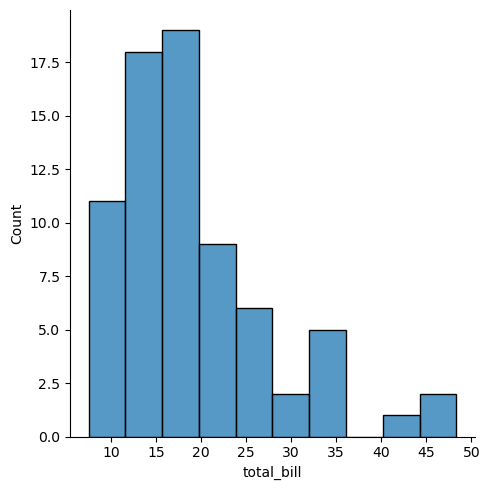

In [192]:
sns.displot(data = tip_sample, x ='total_bill', bins = 10, kde = False)

<Axes: xlabel='total_bill', ylabel='tip'>

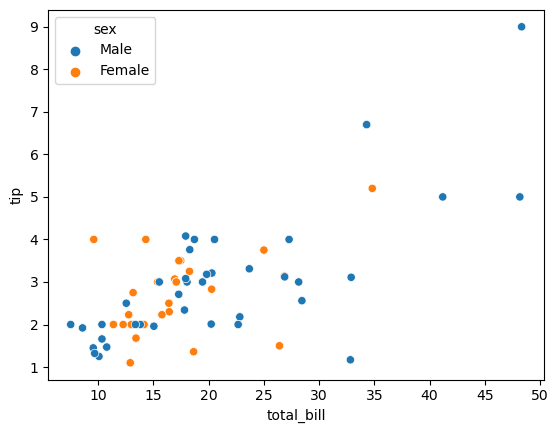

In [193]:
sns.scatterplot(data = tip_sample, x = 'total_bill', y = 'tip', hue = 'sex')

# NUMPY

In [194]:
import numpy as np

In [197]:
x = np.random.random (1000000) 
(print(x))

[0.66329096 0.48368742 0.37900934 ... 0.10384022 0.51604879 0.55127561]


In [198]:
type(x)

numpy.ndarray

In [203]:
import time

In [204]:
start_time = time.time()
sum(x)/len(x)
print (time.time() - start_time)

0.17393136024475098


In [201]:
#For Numpy speed

In [205]:
start_time = time.time()
np.mean(x)
print (time.time() - start_time)

0.002003908157348633


In [206]:
x = np.array([10,9,8,7,6,5,4,3,2,1])
print (x)

[10  9  8  7  6  5  4  3  2  1]


In [207]:
type(x)

numpy.ndarray

In [208]:
x.dtype

dtype('int32')

In [209]:
x.shape

(10,)

In [210]:
x.size

10

In [216]:
import numpy as np

w = np.arange(0, 20)
print(w)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [218]:
t = np.linspace(2,16)
print(t)

[ 2.          2.28571429  2.57142857  2.85714286  3.14285714  3.42857143
  3.71428571  4.          4.28571429  4.57142857  4.85714286  5.14285714
  5.42857143  5.71428571  6.          6.28571429  6.57142857  6.85714286
  7.14285714  7.42857143  7.71428571  8.          8.28571429  8.57142857
  8.85714286  9.14285714  9.42857143  9.71428571 10.         10.28571429
 10.57142857 10.85714286 11.14285714 11.42857143 11.71428571 12.
 12.28571429 12.57142857 12.85714286 13.14285714 13.42857143 13.71428571
 14.         14.28571429 14.57142857 14.85714286 15.14285714 15.42857143
 15.71428571 16.        ]


In [221]:
import numpy as np

# Define a matrix A
A = np.array([[1, 2], [3, 4]])

# Calculate the inverse of matrix A
A_inv = np.linalg.inv(A)
print(A_inv)


[[-2.   1. ]
 [ 1.5 -0.5]]


In [139]:
# Filter the 'Age' column to identify outliers using the upper limit
#outlier_upper = titanic['Age'] > upper_limit

# Count the number of outliers
#num_outliers = len(titanic[outlier_upper])

#print("Number of outliers above the upper limit:", num_outliers)

# Generate random ages between 18 and 65 for each row in the DataFrame
#ra_demographics['age'] = np.random.randint(18, 66, size=len(ra_demographics))


# THANK YOU ALT SCHOOL